In [122]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from data import DataFrame
from utils import open_csv_file
from mlxtend.plotting import plot_confusion_matrix

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [123]:
testing_data = open_csv_file('v2_testing_data.csv')

training_data = open_csv_file('v2_training_data.csv')
training_data_from_sampling = open_csv_file('v2_training_sampling_data.csv')
training_data_from_smote = open_csv_file('v2_training_smote_data.csv')

In [124]:
y_test =DataFrame(testing_data).get_df()[['DEATH_EVENT']]
X_test = DataFrame(testing_data).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

normal data

In [125]:
y_train =DataFrame(training_data).get_df()['DEATH_EVENT']
X_train = DataFrame(training_data).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

In [126]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## initialise your neural network
model = Sequential()

## set up your input layer
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = 'relu', input_dim = 3))

# hidden layer one
model.add(Dense(units = 8, kernel_initializer = "uniform", activation = 'relu'))

# hidden layer two
model.add(Dense(units = 4, kernel_initializer = "uniform", activation = 'relu'))

# regularization
model.add(Dropout(0.25))

#output layer
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [127]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.20, callbacks=[early_stop])

Epoch 1/100


6/6 [==============================] - 1s 24ms/step - loss: 0.6927 - accuracy: 0.7068 - val_loss: 0.6920 - val_accuracy: 0.6875
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.6963 - val_loss: 0.6908 - val_accuracy: 0.6875
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.6963 - val_loss: 0.6897 - val_accuracy: 0.6875
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.6963 - val_loss: 0.6885 - val_accuracy: 0.6875
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.6963 - val_loss: 0.6873 - val_accuracy: 0.6875
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.6963 - val_loss: 0.6860 - val_accuracy: 0.6875
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.6963 - val_loss: 0.6846 - val_accuracy: 0.6875
Epoch 8/100
6/6 [=====================

In [128]:
y_pred_ann = model.predict(X_test)
y_pred_ann

2/2 [==============================] - 0s 1ms/step


array([[0.10083982],
       [0.10716647],
       [0.73634183],
       [0.10278245],
       [0.13222776],
       [0.127385  ],
       [0.76512176],
       [0.1019982 ],
       [0.67128515],
       [0.2878032 ],
       [0.08244721],
       [0.37308064],
       [0.15896757],
       [0.08804177],
       [0.63675225],
       [0.7472784 ],
       [0.07506154],
       [0.20993231],
       [0.11259228],
       [0.07898498],
       [0.15958352],
       [0.4698869 ],
       [0.50056404],
       [0.56725585],
       [0.330539  ],
       [0.1775148 ],
       [0.28656468],
       [0.07594884],
       [0.07511958],
       [0.07594884],
       [0.2034015 ],
       [0.80823433],
       [0.33175176],
       [0.15118569],
       [0.51366776],
       [0.23281989],
       [0.10716647],
       [0.15896757],
       [0.08180396],
       [0.68528384],
       [0.05800785],
       [0.6274811 ],
       [0.22287217],
       [0.33495995],
       [0.7766134 ],
       [0.19089662],
       [0.10515065],
       [0.168

In [129]:
y_pred = np.where(y_pred_ann > 0.50, 1, 0)
y_pred

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [130]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('ANN f1-score      : {:.4f}'.format(f1_score( y_test , y_pred)))
print('ANN precision     : {:.4f}'.format(precision_score(y_test, y_pred)))
print('ANN recall        : {:.4f}'.format(recall_score(y_test, y_pred)))
print("ANN roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred)))

Accuracy Score: 0.7667
Random Forest Classifier f1-score      : 0.6316
Random Forest Classifier precision     : 0.8000
Random Forest Classifier recall        : 0.5217
Random Forest Classifier roc auc score : 0.7203


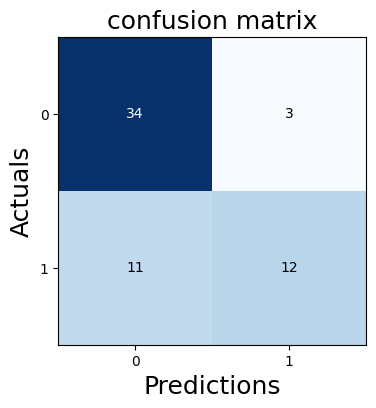

In [131]:
cm = confusion_matrix(y_test, y_pred)

## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

resampling

In [132]:
y_train_resampling =DataFrame(training_data_from_sampling).get_df()['DEATH_EVENT']
X_train_resampling = DataFrame(training_data_from_sampling).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

In [133]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## initialise your neural network
model = Sequential()

## set up your input layer
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = 'relu', input_dim = 3))

# hidden layer one
model.add(Dense(units = 8, kernel_initializer = "uniform", activation = 'relu'))

# hidden layer two
model.add(Dense(units = 4, kernel_initializer = "uniform", activation = 'relu'))

# regularization
model.add(Dropout(0.25))

#output layer
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = 'sigmoid'))

#compiling the network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [134]:
model.fit(X_train_resampling, y_train_resampling, batch_size=32, epochs=100, validation_split=0.20, callbacks=[early_stop])

Epoch 1/100
4/4 [==============================] - 0s 37ms/step - loss: 0.6930 - accuracy: 0.5690 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.6293 - val_loss: 0.6966 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.6293 - val_loss: 0.6982 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.6293 - val_loss: 0.6999 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.6293 - val_loss: 0.7017 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.6293 - val_loss: 0.7035 - val_accuracy: 0.0000e+00
Epoch 6: early stopping


In [135]:
y_pred_ann_resampling = model.predict(X_test)
y_pred_ann_resampling

2/2 [==============================] - 0s 2ms/step


array([[0.4947871 ],
       [0.49478918],
       [0.49485636],
       [0.49478838],
       [0.4947959 ],
       [0.4947948 ],
       [0.49484   ],
       [0.49478686],
       [0.49484345],
       [0.49482626],
       [0.4947787 ],
       [0.49484265],
       [0.4947996 ],
       [0.49478126],
       [0.4948485 ],
       [0.4948458 ],
       [0.49477556],
       [0.4948174 ],
       [0.49479148],
       [0.4947779 ],
       [0.4948038 ],
       [0.49483314],
       [0.49484104],
       [0.49484175],
       [0.49481368],
       [0.49480835],
       [0.49481034],
       [0.49477535],
       [0.49477524],
       [0.49477535],
       [0.49481416],
       [0.49485222],
       [0.494837  ],
       [0.4948034 ],
       [0.49482715],
       [0.4948218 ],
       [0.49478918],
       [0.4947996 ],
       [0.4947772 ],
       [0.4948555 ],
       [0.49476397],
       [0.4948395 ],
       [0.49481967],
       [0.4948387 ],
       [0.4948606 ],
       [0.49480906],
       [0.4947879 ],
       [0.494

In [136]:
y_pred_sampling = np.where(y_pred_ann_resampling > 0.50, 1, 0)
y_pred_sampling

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [137]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred_sampling)))
print('ANN f1-score      : {:.4f}'.format(f1_score( y_test , y_pred_sampling)))
print('ANN precision     : {:.4f}'.format(precision_score(y_test, y_pred_sampling)))
print('ANN recall        : {:.4f}'.format(recall_score(y_test, y_pred_sampling)))
print("ANN roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred_sampling)))

Accuracy Score: 0.6167
Random Forest Classifier f1-score      : 0.0000
Random Forest Classifier precision     : 0.0000
Random Forest Classifier recall        : 0.0000
Random Forest Classifier roc auc score : 0.5000


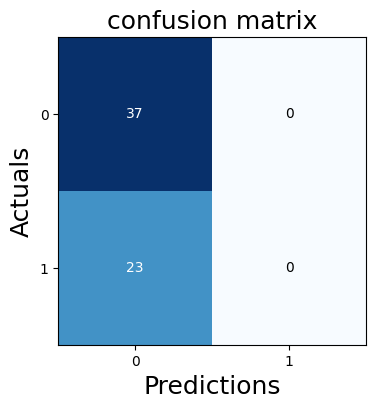

In [138]:
cm = confusion_matrix(y_test, y_pred_sampling)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

SMOTE

In [139]:
y_train_smote =DataFrame(training_data_from_smote).get_df()['DEATH_EVENT']
X_train_smote = DataFrame(training_data_from_smote).get_df()[['time_bucket', 'ejection_fraction', 'serum_creatinine']]

In [140]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## initialise your neural network
model = Sequential()

## set up your input layer
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = 'relu', input_dim = 3))

# hidden layer one
model.add(Dense(units = 8, kernel_initializer = "uniform", activation = 'relu'))

# hidden layer two
model.add(Dense(units = 4, kernel_initializer = "uniform", activation = 'relu'))

# regularization
model.add(Dropout(0.25))

#output layer
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = 'sigmoid'))

#compiling the network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [141]:
model.fit(X_train_smote, y_train_smote, batch_size=32, epochs=100, validation_split=0.20, callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 0s 113ms/step - loss: 0.6931 - accuracy: 0.5763 - val_loss: 0.6940 - val_accuracy: 0.0667
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 0.6929 - accuracy: 0.6102 - val_loss: 0.6949 - val_accuracy: 0.0667
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 0.6926 - accuracy: 0.6102 - val_loss: 0.6957 - val_accuracy: 0.0667
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 0.6925 - accuracy: 0.6102 - val_loss: 0.6966 - val_accuracy: 0.0667
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 0.6922 - accuracy: 0.6102 - val_loss: 0.6974 - val_accuracy: 0.0667
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 0.6920 - accuracy: 0.6102 - val_loss: 0.6983 - val_accuracy: 0.0667
Epoch 6: early stopping


In [142]:
y_pred_ann_smote = model.predict(X_test)
y_pred_ann_smote

2/2 [==============================] - 0s 2ms/step


array([[0.49705145],
       [0.49705184],
       [0.49706918],
       [0.49705222],
       [0.4970542 ],
       [0.49705222],
       [0.4970714 ],
       [0.4970509 ],
       [0.49707443],
       [0.4970622 ],
       [0.49704903],
       [0.4970656 ],
       [0.49705553],
       [0.4970504 ],
       [0.49706754],
       [0.49706873],
       [0.49704856],
       [0.49706027],
       [0.49705264],
       [0.49704936],
       [0.4970554 ],
       [0.49706405],
       [0.49706706],
       [0.497067  ],
       [0.49706075],
       [0.49705803],
       [0.4970596 ],
       [0.49704814],
       [0.49704826],
       [0.49704814],
       [0.49705818],
       [0.4970705 ],
       [0.49706233],
       [0.49705642],
       [0.4970719 ],
       [0.49705857],
       [0.49705184],
       [0.49705553],
       [0.49704802],
       [0.49706963],
       [0.49704415],
       [0.49706677],
       [0.4970598 ],
       [0.49706566],
       [0.49707308],
       [0.49705845],
       [0.4970511 ],
       [0.497

In [143]:
y_pred_smote = np.where(y_pred_ann_smote > 0.50, 1, 0)
y_pred_smote

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [144]:
print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred_smote)))
print('ANN f1-score      : {:.4f}'.format(f1_score( y_test , y_pred_smote)))
print('ANN precision     : {:.4f}'.format(precision_score(y_test, y_pred_smote)))
print('ANN recall        : {:.4f}'.format(recall_score(y_test, y_pred_smote)))
print("ANN roc auc score : {:.4f}".format(roc_auc_score(y_test,y_pred_smote)))

Accuracy Score: 0.6167
Random Forest Classifier f1-score      : 0.0000
Random Forest Classifier precision     : 0.0000
Random Forest Classifier recall        : 0.0000
Random Forest Classifier roc auc score : 0.5000


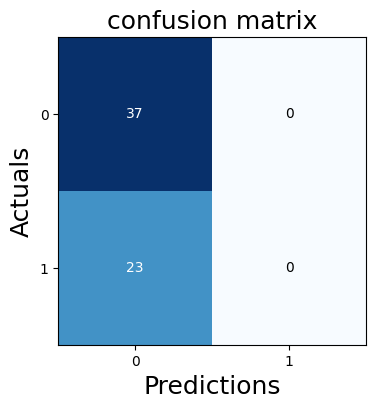

In [145]:
cm = confusion_matrix(y_test, y_pred_smote)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()